In [17]:
import pandas as pd    
import geopandas as gpd
from geopandas.tools import geocode
import numpy as np
import scipy.stats as stats
import scipy
import shapely
from shapely import speedups
speedups.enabled
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

In [18]:
import urllib.request as request

In [25]:
url_list = ['https://opendata.arcgis.com/datasets/7015d5d46a284f94ac05c2ea4358bcd7_0.geojson',
            'https://opendata.arcgis.com/datasets/5fc63b2a48474100b560a7d98b5097d7_1.geojson',
            'https://opendata.arcgis.com/datasets/27af9a2485c5442bb061fa7e881d7022_2.geojson',
            'https://opendata.arcgis.com/datasets/4f62515558174f53979b3be0335004d3_3.geojson',
            'https://opendata.arcgis.com/datasets/29f801d03c9b4b608bca6a8e497278c3_4.geojson',
            'https://opendata.arcgis.com/datasets/a0019dd0d6464747a88921f5e103d509_5.geojson',
            'https://opendata.arcgis.com/datasets/40bcfbc4054549ebba8b5777bbdd40ff_6.geojson',
            'https://opendata.arcgis.com/datasets/16cedd233d914118a275c6510115d466_7.geojson',
            'https://opendata.arcgis.com/datasets/902fd604ecf54adf8579894508cacc68_8.geojson',
            'https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson',
            'https://opendata.arcgis.com/datasets/2c37babc94d64bbb938a9b520bc5538c_10.geojson',
            'https://opendata.arcgis.com/datasets/a35aa9249110472ba2c69cc574eff984_11.geojson']
    

In [19]:
def get_census_bounds():
    url = 'https://opendata.arcgis.com/datasets/de58dc3e1efc49b782ab357e044ea20c_9.geojson'
    bounds = gpd.read_file(url)
    return bounds

In [27]:
def get_gdf(year):
    '''Enter the desired year to download the traffic flow count
    data for that year. Example: enter '7' for the year 2007.
    '''
    num = year-7
    gdf_year = gpd.read_file(url_list[num])
    if year == 11:
        gdf_year = gdf_year.rename(columns={"YEAR_" : 'YEAR'})
    if year == 12:
        gdf_year = gdf_year.rename(columns={'STDY_YEAR' : 'YEAR'})
    if year == 15 or year == 16:
        gdf_year = gdf_year.rename(columns={"COUNTAAWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'FIRST_STNAME_ORD' : 'STNAME'})
        gdf_year = gdf_year[['AAWDT', 'GEOBASID', 'STNAME', 'SHAPE_Length', 'geometry']]
        if year == 15:
            year_list = ['2015']*len(gdf_year)
            gdf_year['YEAR'] = year_list
        elif year == 16:
            year_list = ['2016']*len(gdf_year)
            gdf_year['YEAR'] = year_list
    elif year == 17 or year == 18:
        gdf_year = gdf_year.rename(columns={"AWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'STNAME_ORD' : 'STNAME'})
        gdf_year = gdf_year[['AAWDT', 'GEOBASID', 'STNAME', 'SHAPE_Length', 'geometry']]
        if year == 17:
            year_list = ['2017']*len(gdf_year)
            gdf_year['YEAR'] = year_list
        elif year == 18:
            year_list = ['2016']*len(gdf_year)
            gdf_year['YEAR'] = year_list
    #df_year_AAWDT = df_year['AAWDT'].values
    #df_year_geobase = df_year['GEOBASID'].values
    #df_year_dist = df_year['SHAPE_Length'].values
    gdf_year = gdf_year[[ 'YEAR', 'AAWDT', 'GEOBASID', 'STNAME', 'SHAPE_Length', 'geometry']]
    return gdf_year #, df_year_AAWDT, df_year_geobase, df_year_dist

In [5]:
census_bounds = get_census_bounds()

In [6]:
census_bounds.head()

,OBJECTID,TRACT,TRACTCE10,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,WATER,SHAPE_Length,SHAPE_Area,geometry
0,1,2500,002500,53033002500,25,Census Tract 25,243.219083,0,16442.968402,1.059462e+07,"POLYGON ((-122.29602 47.69023, -122.29608 47.6..."
1,2,2600,002600,53033002600,26,Census Tract 26,307.584420,0,15936.137058,1.339838e+07,"POLYGON ((-122.30817 47.69031, -122.30947 47.6..."
2,3,5600,005600,53033005600,56,Census Tract 56,737.511727,0,30337.294354,3.212601e+07,"POLYGON ((-122.39300 47.63956, -122.39421 47.6..."
3,4,6800,006800,53033006800,68,Census Tract 68,177.438771,0,11275.376490,7.729233e+06,"POLYGON ((-122.35070 47.63994, -122.35130 47.6..."
4,5,6000,006000,53033006000,60,Census Tract 60,324.567432,0,19729.922875,1.413816e+07,"POLYGON ((-122.34279 47.64320, -122.34280 47.6..."


In [40]:
census_selection = census_bounds.loc[census_bounds['NAME10'] == '53.02']

In [41]:
census_selection

,OBJECTID,TRACT,TRACTCE10,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,WATER,SHAPE_Length,SHAPE_Area,geometry
84,128,5302,005302,53033005302,53.02,Census Tract 53.02,577.317916,0,33889.310995,2.514797e+07,"POLYGON ((-122.30653 47.66126, -122.30725 47.6..."


<AxesSubplot:>

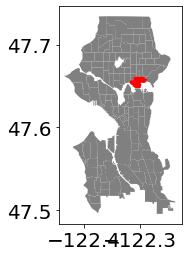

In [42]:
fig, ax = plt.subplots()

census_bounds.plot(ax=ax, facecolor='gray')
census_selection.plot(ax=ax, facecolor='red')

In [24]:
import get_geodata

In [43]:
gdf_15 = get_gdf(15)
gdf_15.head()

,YEAR,AAWDT,GEOBASID,STNAME,SHAPE_Length,geometry
0,2015,24000.0,2028.0,W SEA BR EB 4 AV OFF RP,1458.971527,"LINESTRING (-122.33092 47.57152, -122.33054 47..."
1,2015,38000.0,2029.0,MYERS WAY S,335.499087,"LINESTRING (-122.33484 47.52232, -122.33482 47..."
2,2015,13000.0,2030.0,S CLOVERDALE ST,987.546181,"LINESTRING (-122.32820 47.52648, -122.32961 47..."
3,2015,11000.0,2031.0,S CLOVERDALE ST,1305.323633,"LINESTRING (-122.32292 47.52647, -122.32377 47..."
4,2015,12200.0,2032.0,M L KING JR WAY S,609.897683,"LINESTRING (-122.28085 47.53540, -122.28087 47..."


In [49]:
Udist_mask = gdf_15.within(census_selection.at[84, 'geometry'])
print(pip_mask)

0       False
1       False
2       False
3       False
4       False
        ...  
1855    False
1856    False
1857    False
1858    False
1859    False
Length: 1860, dtype: bool


In [50]:
Udist_data = gdf_15.loc[pip_mask]
Udist_data.head()

,YEAR,AAWDT,GEOBASID,STNAME,SHAPE_Length,geometry
64,2015,21672.12064,1960.0,NE PACIFIC ST,426.892327,"LINESTRING (-122.30597 47.64970, -122.30515 47..."
65,2015,24000.00000,1961.0,EASTLAKE AVE NE,225.306037,"LINESTRING (-122.31784 47.65602, -122.31797 47..."
561,2015,43594.80300,1412.0,MONTLAKE BLVD NE,2966.829559,"LINESTRING (-122.30114 47.65898, -122.30207 47..."
572,2015,31500.00000,1423.0,MONTLAKE BLVD NE,575.275702,"LINESTRING (-122.30001 47.66035, -122.30004 47..."
573,2015,19500.00000,1424.0,25TH AVE NE,560.713939,"LINESTRING (-122.30114 47.65898, -122.30106 47..."


<AxesSubplot:>

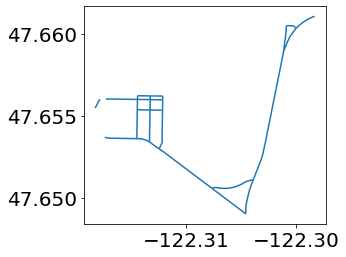

In [51]:
Udist_data.plot()